In [2]:
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid',rc={'figure.figsize':(14,8)})

### Real data (model, grid)

In [3]:
real_files = pathlib.Path('climateChallengeData/real_full/').glob('real*')
real_dfs = [pd.read_csv(file) for file in real_files]

In [9]:
real_per_day = pd.concat(real_dfs)
real_per_day['day'] = pd.to_datetime(real_per_day['day'],  format='%d/%m/%Y')

In [15]:
real_per_day = real_per_day.set_index('day')
real_per_day = real_per_day.groupby(real_per_day.index).agg({'T_MEAN': 'mean'})

In [19]:
real_per_day.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='day', length=1461, freq=None)

In [21]:
times_gaps = real_per_day.index - real_per_day.index.shift(1, freq='1d')
times_gaps

TimedeltaIndex(['-1 days', '-1 days', '-1 days', '-1 days', '-1 days',
                '-1 days', '-1 days', '-1 days', '-1 days', '-1 days',
                ...
                '-1 days', '-1 days', '-1 days', '-1 days', '-1 days',
                '-1 days', '-1 days', '-1 days', '-1 days', '-1 days'],
               dtype='timedelta64[ns]', name='day', length=1461, freq=None)

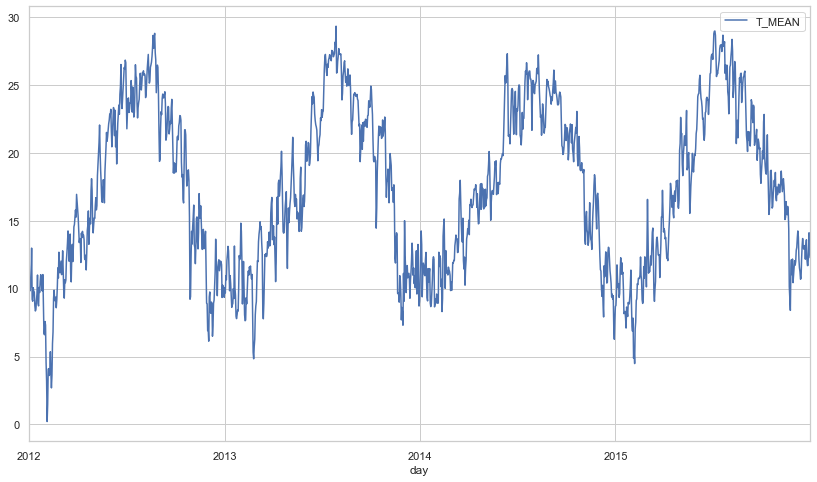

In [7]:
real_per_day.plot()

### Official stations

In [14]:
stations_xls = pd.ExcelFile('climateChallengeData/data_S2_S3_S4.xlsx')

In [15]:
stations_dfs = [stations_xls.parse(sheet) for sheet in stations_xls.sheet_names]

In [16]:
stations_df = pd.concat(stations_dfs)

/home/biel/.conda/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [17]:
stations_df['DATA'] = pd.to_datetime(stations_df['DATA'], format="%Y-%m-%d")

In [18]:
stations_df.head()

,CODI,COMARCA,DATA,DVum10,DVum6,DVx10,DVx6,ESTACIO,HRm,PPT24h,RS24h,Tm,Tn,Tx,VVem10,VVem6,VVx10,VVx6,hPa
0,WU,Barcelonès,2005-09-22,NaN,223.0,NaN,NaN,Badalona - Museu,72.0,0.0,19.5,19.8,15.0,22.9,NaN,NaN,NaN,8.3,NaN
1,WU,Barcelonès,2005-09-23,NaN,220.0,NaN,NaN,Badalona - Museu,77.0,0.0,14.5,21.3,18.2,23.9,NaN,NaN,NaN,7.9,1012.3
2,WU,Barcelonès,2005-09-24,NaN,195.0,NaN,NaN,Badalona - Museu,80.0,0.0,17.0,21.9,19.1,23.5,NaN,NaN,NaN,5.9,1011.8
3,WU,Barcelonès,2005-09-25,NaN,254.0,NaN,NaN,Badalona - Museu,80.0,11.4,11.1,21.0,16.7,24.6,NaN,NaN,NaN,12.0,1009.7
4,WU,Barcelonès,2005-09-26,NaN,11.0,NaN,NaN,Badalona - Museu,74.0,0.2,15.3,19.7,16.8,22.9,NaN,NaN,NaN,6.6,1015.2


In [19]:
stations_df.ESTACIO.unique()

array(['Badalona - Museu', 'Barcelona - Zoo', 'Barcelona - el Raval',
       'Barcelona - Zona Universitària'], dtype=object)

In [20]:
stations_df.iloc[stations_df[['Tm', 'Tx']].idxmax().values]

,CODI,COMARCA,DATA,DVum10,DVum6,DVx10,DVx6,ESTACIO,HRm,PPT24h,RS24h,Tm,Tn,Tx,VVem10,VVem6,VVx10,VVx6,hPa
3759,WU,Barcelonès,2016-01-07,NaN,271.0,NaN,290.0,Badalona - Museu,54.0,0.0,5.5,15.5,10.5,19.8,NaN,4.9,NaN,15.7,1003.2
3759,WU,Barcelonès,2016-01-07,NaN,271.0,NaN,290.0,Badalona - Museu,54.0,0.0,5.5,15.5,10.5,19.8,NaN,4.9,NaN,15.7,1003.2


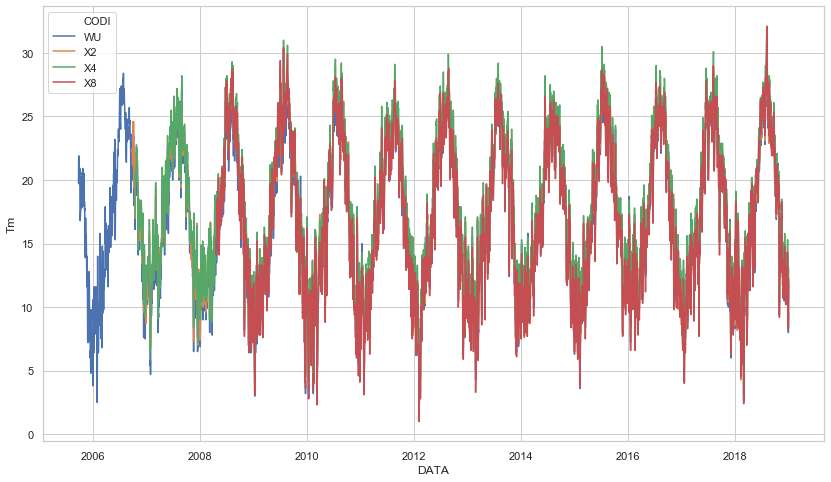

In [21]:
sns.lineplot(x='DATA', y='Tm', hue='CODI', data=stations_df)

In [22]:
stations_mean_df = stations_df.groupby('DATA').agg({'Tm':'mean'})

In [23]:
stations_overlaping_real = stations_mean_df.loc[real_per_day.index.min():real_per_day.index.max()]

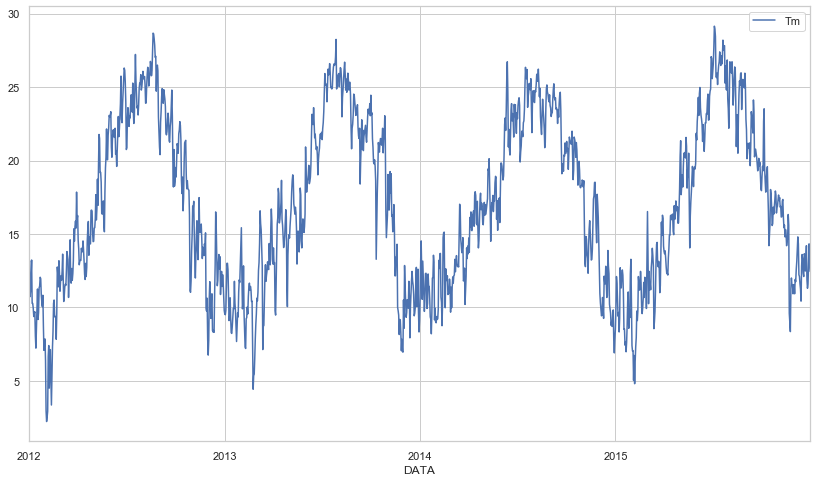

In [24]:
ax1 = stations_overlaping_real.plot()

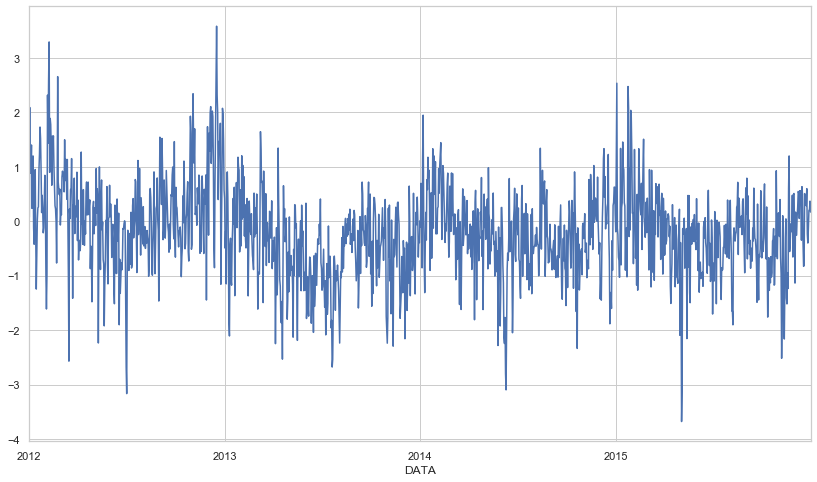

In [25]:
(stations_overlaping_real['Tm'] - real_per_day['T_MEAN']).plot()

In [26]:
df_all = real_per_day.join(stations_overlaping_real)

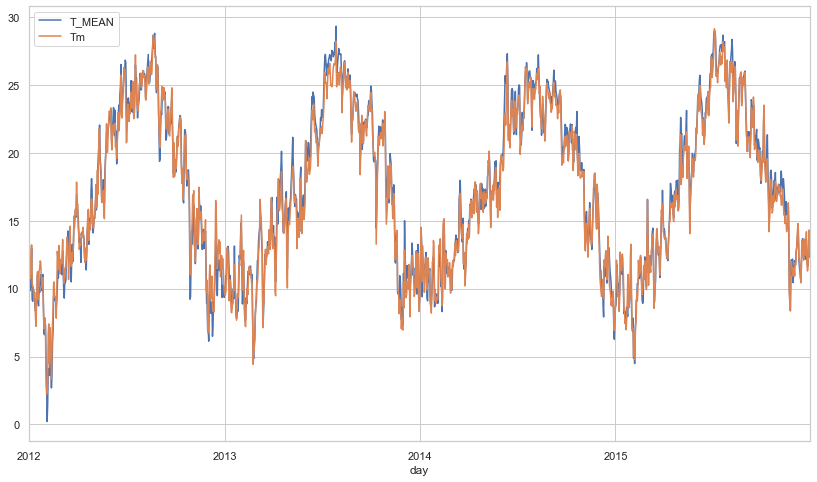

In [27]:
df_all.plot()

## NonOfficial stations

In [29]:
nonofficial_xls = pd.ExcelFile('climateChallengeData/data_NoOfficial.xlsx')

In [30]:
nonofficial_df = nonofficial_xls.parse('Sheet1', index_col=0, decimal=',')

In [31]:
nonofficial_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40379 entries, 0 to 40378
Data columns (total 12 columns):
Date          40379 non-null object
Alt           40379 non-null int64
Temp_Max      40379 non-null float64
Temp_Min      40379 non-null float64
Hum_Max       40379 non-null int64
Hum_Min       40379 non-null int64
Pres_Max      40379 non-null float64
Pres_Min      40379 non-null float64
Wind_Max      40379 non-null object
Prec_Today    40379 non-null object
Prec_Year     38402 non-null object
Station       40379 non-null object
dtypes: float64(4), int64(3), object(5)
memory usage: 4.0+ MB


In [32]:
nonofficial_df['Date'] = pd.to_datetime(nonofficial_df['Date'],  format='%d/%m/%Y')

In [33]:
nonofficial_by_day = nonofficial_df.groupby(['Date']).mean()

In [34]:
nonofficial_by_day['Temp_mean'] = nonofficial_by_day[['Temp_Max', 'Temp_Min']].mean(axis=1)

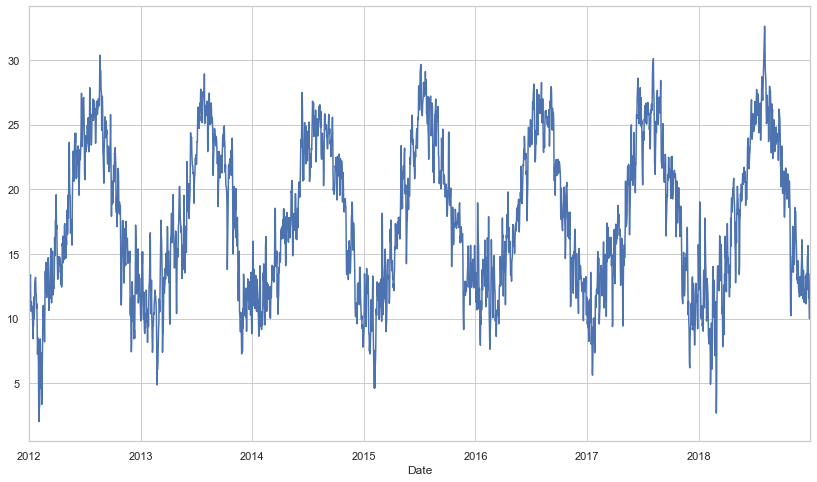

In [35]:
nonofficial_by_day.Temp_mean.plot()

In [36]:
df_all['Temp_Mean'] = nonofficial_by_day.Temp_mean

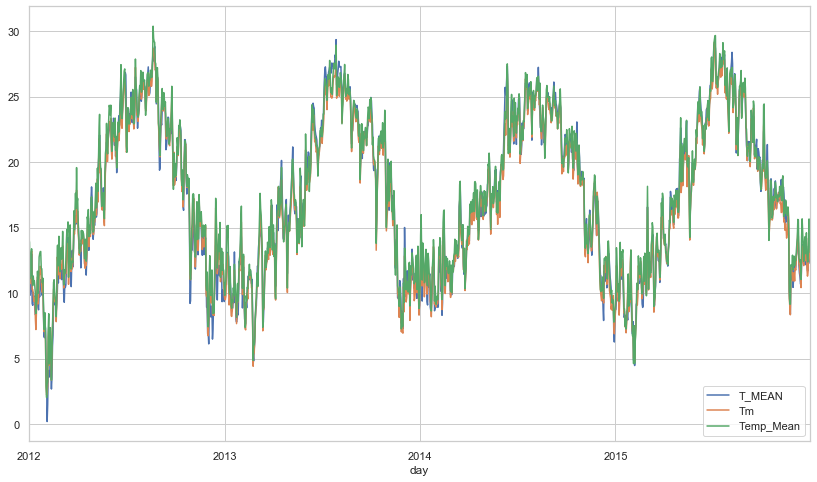

In [37]:
df_all.plot()

In [38]:
stations_df.columns

Index(['CODI', 'COMARCA', 'DATA', 'DVum10', 'DVum6', 'DVx10', 'DVx6',
       'ESTACIO', 'HRm', 'PPT24h', 'RS24h', 'Tm', 'Tn', 'Tx', 'VVem10',
       'VVem6', 'VVx10', 'VVx6', 'hPa'],
      dtype='object')

In [39]:
df_all = df_all.join(stations_df.groupby('DATA').mean()['RS24h'])

In [40]:
df_all.corr()

,T_MEAN,Tm,Temp_Mean,RS24h
T_MEAN,1.000000,0.990669,0.989122,0.628399
Tm,0.990669,1.000000,0.997010,0.631875
Temp_Mean,0.989122,0.997010,1.000000,0.631677
RS24h,0.628399,0.631875,0.631677,1.000000


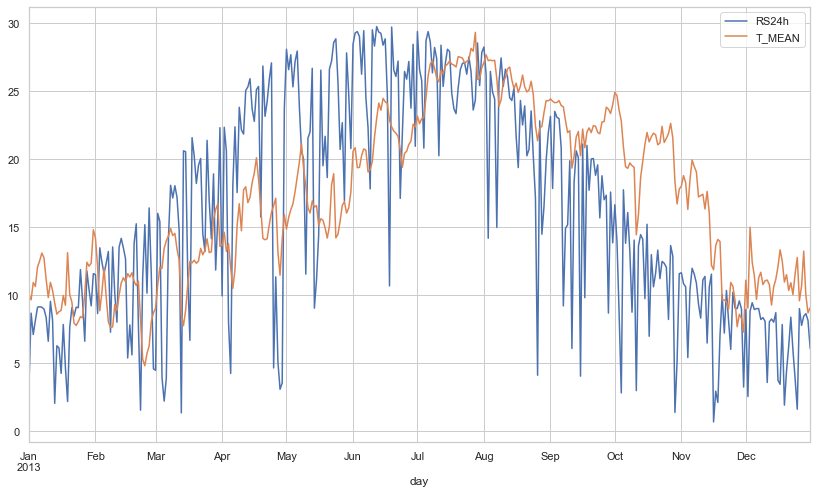

In [41]:
df_all.loc[df_all.index.year == 2013][['RS24h', 'T_MEAN']].plot()

In [42]:
stations_pivot = stations_df.pivot(index='DATA', columns='CODI', values='Tm')

In [43]:
stations_pivot['day_of_year'] = stations_pivot.index.dayofyear

In [44]:
stations_pivot

CODI,WU,X2,X4,X8,day_of_year
DATA,,,,,
2005-09-22,19.8,NaN,NaN,NaN,265
2005-09-23,21.3,NaN,NaN,NaN,266
2005-09-24,21.9,NaN,NaN,NaN,267
2005-09-25,21.0,NaN,NaN,NaN,268
2005-09-26,19.7,NaN,NaN,NaN,269
...,...,...,...,...,...
2018-12-27,10.5,10.6,12.3,10.4,361
2018-12-28,9.0,9.1,11.3,9.4,362
2018-12-29,8.0,8.4,10.6,8.3,363


In [63]:
final = real_per_day.join(stations_pivot)

In [64]:
final = final.join(stations_df.groupby('DATA')['RS24h'].mean())

In [67]:
final.dropna(inplace=True)

In [68]:
y = final.pop('T_MEAN').values

In [69]:
X = final.values

In [135]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error

import numpy as np
import pandas as pd
import sklearn.gaussian_process as gp

def default_model_test(model, X_train, y_train, X_test, y_test):
    mod = model
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    return mean_squared_error(y_test, y_pred), np.sum(np.abs(y_test-y_pred))

def default_model_predict(model, X_train, y_train, X_test):
    mod = model
    mod.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    return y_pred

def choose_best_default_model(X, y):
    
    models = [RandomForestRegressor(n_jobs=-1),
              LinearRegression(n_jobs=-1),
              Ridge(alpha=0.1),
              Lasso(alpha=0.1),
              xgboost.XGBRegressor(objective='reg:squarederror'),
              AdaBoostRegressor(base_estimator=Ridge(alpha=0.1),
                                learning_rate=0.01, n_estimators=100,
                                loss='linear'),
              AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),
                                learning_rate=0.5),
              ]
    results = {}
    fold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    for i, j in enumerate(models):
        absolute = []
        for train_idx, test_idx in fold.split(X):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]
        
            s, a = default_model_test(j, X_train, y_train, X_test, y_test)
            
            absolute.append(a)
        
        results[type(j).__name__] = np.sum(absolute)

    return results
    

In [136]:
choose_best_default_model(X, y)

/home/biel/.conda/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'RandomForestRegressor': 878.3538168832622,
 'LinearRegression': 878.3758186113969,
 'Ridge': 878.3724163858304,
 'Lasso': 878.7146381954796,
 'XGBRegressor': 814.5803888109551,
 'AdaBoostRegressor': 893.39935545517}

In [137]:
scaler = StandardScaler()

In [144]:
scaled_x = scaler.fit_transform(X[:-1, :], y)

In [145]:
choose_best_default_model(scaled_x, y)

/home/biel/.conda/envs/ds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'RandomForestRegressor': 870.5235789094718,
 'LinearRegression': 878.1455237898929,
 'Ridge': 878.1087417769139,
 'Lasso': 884.8644397824877,
 'XGBRegressor': 810.8713146961545,
 'AdaBoostRegressor': 889.9029498268641}